In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('results.csv')

In [10]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False
45314,2023-11-21,Romania,Switzerland,1,0,UEFA Euro qualification,Bucharest,Romania,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45315 entries, 0 to 45314
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        45315 non-null  object
 1   home_team   45315 non-null  object
 2   away_team   45315 non-null  object
 3   home_score  45315 non-null  int64 
 4   away_score  45315 non-null  int64 
 5   tournament  45315 non-null  object
 6   city        45315 non-null  object
 7   country     45315 non-null  object
 8   neutral     45315 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


In [13]:
df.shape

(45315, 9)

In [14]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [15]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [16]:
def score_to_int(score):
    score=int(score)
    return score


In [17]:
df['home_score'] = df.apply(lambda x: score_to_int(x['home_score']), axis=1)
df['away_score'] = df.apply(lambda x: score_to_int(x['away_score']), axis=1)

In [18]:
df2=df.copy() 

In [19]:
df2.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [20]:
df_barp = df2['tournament'].value_counts().head(20).reset_index()
df_barp = df_barp.rename(columns={'index':'Type','tournament':'Tournament','count':'Matches_Played'})

In [21]:
df_barp

,Tournament,Matches_Played
0,Friendly,17773
1,FIFA World Cup qualification,8016
2,UEFA Euro qualification,2815
3,African Cup of Nations qualification,1998
4,FIFA World Cup,964
5,Copa América,841
6,AFC Asian Cup qualification,764
7,African Cup of Nations,741
8,CECAFA Cup,620
9,CFU Caribbean Cup qualification,606


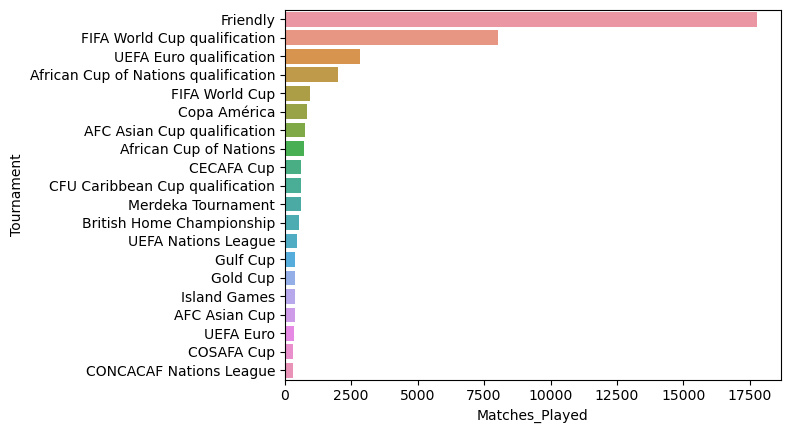

In [22]:
ax = sns.barplot(y='Tournament',x='Matches_Played', data=df_barp)

In [23]:
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [24]:
ax.bar_label(ax.containers[0])

[Text(0, 0, '17773'),
 Text(0, 0, '8016'),
 Text(0, 0, '2815'),
 Text(0, 0, '1998'),
 Text(0, 0, '964'),
 Text(0, 0, '841'),
 Text(0, 0, '764'),
 Text(0, 0, '741'),
 Text(0, 0, '620'),
 Text(0, 0, '606'),
 Text(0, 0, '595'),
 Text(0, 0, '517'),
 Text(0, 0, '472'),
 Text(0, 0, '395'),
 Text(0, 0, '389'),
 Text(0, 0, '379'),
 Text(0, 0, '370'),
 Text(0, 0, '337'),
 Text(0, 0, '309'),
 Text(0, 0, '308')]

In [25]:
def winning_team(home_score, away_score, home_team, away_team):
    if (home_score > away_score):
        winner = home_team
    elif (home_score < away_score):
        winner = away_team
    else:
        winner = 'Draw'
    return winner

In [26]:
def losing_team(home_score, away_score, home_team, away_team):
    if (home_score < away_score):
        loser = home_team
    elif (home_score > away_score):
        loser = away_team
    else:
        loser = 'Draw'
    return loser

In [27]:
df2['winner']=df2.apply(lambda x: winning_team(x['home_score'], x['away_score'], x['home_team'], x['away_team']), axis=1)
df2['loser']=df2.apply(lambda x: losing_team(x['home_score'], x['away_score'], x['home_team'], x['away_team']), axis=1)

In [28]:
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England
...,...,...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False,Draw,Draw
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,Croatia,Armenia
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,Israel,Andorra
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,Belarus,Kosovo


In [29]:
def scoreline(score1, score2):
    scores = str(score1) + "-" + str(score2)
    return scores

In [30]:
scoreline(5,0)


'5-0'

In [31]:
df2['scoreline']=df2.apply(lambda x: scoreline(x['home_score'],x['away_score']),axis=1)

In [32]:
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw,0-0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,4-2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,2-1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw,2-2
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,3-0
...,...,...,...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False,Draw,Draw,1-1
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,Croatia,Armenia,1-0
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,Israel,Andorra,0-2
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,Belarus,Kosovo,0-1


In [33]:
def goals_sum(homegoal,awaygoal):
    a=int(homegoal)+int(awaygoal)
    return a;

In [34]:
df2['total_goals']=df2.apply(lambda x: goals_sum(x['home_score'],x['away_score']),axis=1)

In [35]:
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw,0-0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,4-2,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,2-1,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw,2-2,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,3-0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False,Draw,Draw,1-1,2
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,Croatia,Armenia,1-0,1
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,Israel,Andorra,0-2,2
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,Belarus,Kosovo,0-1,1


In [36]:
df2['total_goals'].sum()

132209

In [37]:
df2['tournament'].unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Copa Lipton', 'Copa Newton', 'Copa Premio Honor Argentino',
       'Copa Premio Honor Uruguayo', 'Copa Roca', 'Copa América',
       'Copa Chevallier Boutell', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFC Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Ju

In [38]:
df_wc=df2[df2['tournament']=='FIFA World Cup']

In [39]:
df_wc

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,Belgium,0-3,3
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France,Mexico,4-1,5
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia,Brazil,1-2,3
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania,Peru,1-3,4
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina,France,1-0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44349,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True,France,England,1-2,3
44351,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,Argentina,Croatia,3-0,3
44352,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True,France,Morocco,2-0,2
44356,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,Croatia,Morocco,2-1,3


In [40]:
df_wc['total_goals'].sum()

2720

<Axes: xlabel='tournament', ylabel='total_goals'>

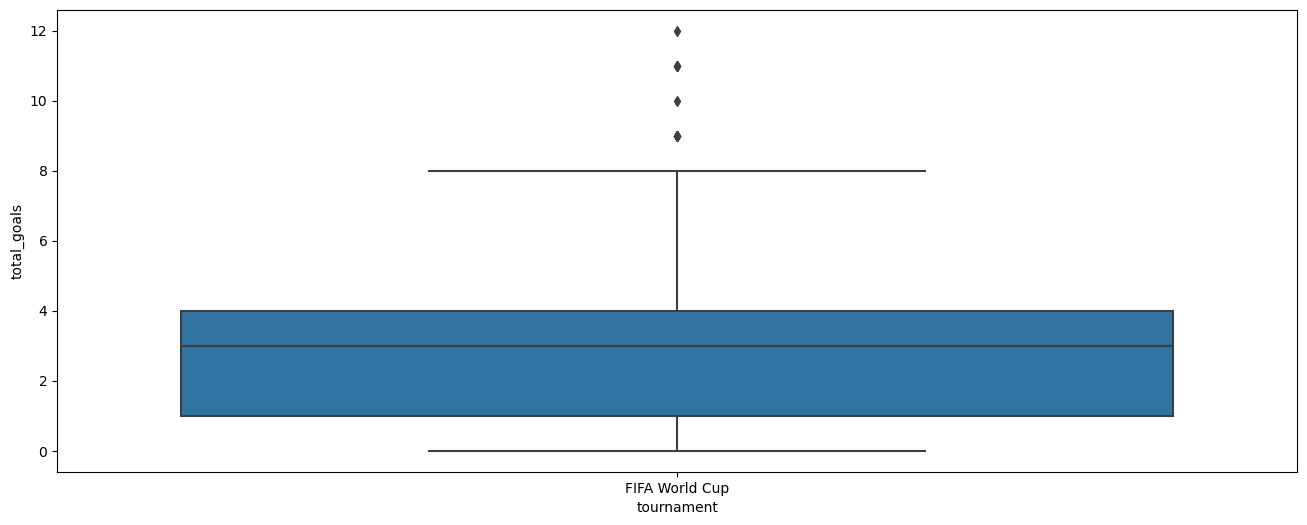

In [41]:
plt.figure(figsize=(16,6))
#plt.xticks(rotation = 45)
sns.boxplot(x="tournament", y="total_goals", data=df_wc)

In [42]:
df_wc2014 = df_wc[(df_wc['date']>'2014-01-01') & (df_wc['date']<'2015-01-01')]
df_wc2014

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
36502,2014-06-12,Brazil,Croatia,3,1,FIFA World Cup,São Paulo,Brazil,False,Brazil,Croatia,3-1,4
36503,2014-06-13,Chile,Australia,3,1,FIFA World Cup,Cuiabá,Brazil,True,Chile,Australia,3-1,4
36504,2014-06-13,Mexico,Cameroon,1,0,FIFA World Cup,Natal,Brazil,True,Mexico,Cameroon,1-0,1
36505,2014-06-13,Spain,Netherlands,1,5,FIFA World Cup,Salvador,Brazil,True,Netherlands,Spain,1-5,6
36506,2014-06-14,Colombia,Greece,3,0,FIFA World Cup,Belo Horizonte,Brazil,True,Colombia,Greece,3-0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36567,2014-07-05,Netherlands,Costa Rica,0,0,FIFA World Cup,Salvador,Brazil,True,Draw,Draw,0-0,0
36569,2014-07-08,Brazil,Germany,1,7,FIFA World Cup,Belo Horizonte,Brazil,False,Germany,Brazil,1-7,8
36570,2014-07-09,Netherlands,Argentina,0,0,FIFA World Cup,São Paulo,Brazil,True,Draw,Draw,0-0,0
36572,2014-07-12,Brazil,Netherlands,0,3,FIFA World Cup,Brasília,Brazil,False,Netherlands,Brazil,0-3,3


In [43]:
df_max=df_wc2014[df_wc2014['total_goals']==df_wc2014['total_goals'].max()]

In [44]:
df_max

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
36569,2014-07-08,Brazil,Germany,1,7,FIFA World Cup,Belo Horizonte,Brazil,False,Germany,Brazil,1-7,8


In [45]:
matches_with_most_goals_wc2014 = df_wc2014.sort_values('total_goals',ascending=False)

In [46]:
matches_with_most_goals_wc2014.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
36569,2014-07-08,Brazil,Germany,1,7,FIFA World Cup,Belo Horizonte,Brazil,False,Germany,Brazil,1-7,8
36528,2014-06-20,Switzerland,France,2,5,FIFA World Cup,Salvador,Brazil,True,France,Switzerland,2-5,7
36535,2014-06-22,South Korea,Algeria,2,4,FIFA World Cup,Porto Alegre,Brazil,True,Algeria,South Korea,2-4,6
36505,2014-06-13,Spain,Netherlands,1,5,FIFA World Cup,Salvador,Brazil,True,Netherlands,Spain,1-5,6
36549,2014-06-25,Nigeria,Argentina,2,3,FIFA World Cup,Porto Alegre,Brazil,True,Argentina,Nigeria,2-3,5
36538,2014-06-23,Brazil,Cameroon,4,1,FIFA World Cup,Brasília,Brazil,False,Brazil,Cameroon,4-1,5
36519,2014-06-18,Australia,Netherlands,2,3,FIFA World Cup,Curitiba,Brazil,True,Netherlands,Australia,2-3,5
36544,2014-06-24,Japan,Colombia,1,4,FIFA World Cup,Cuiabá,Brazil,True,Colombia,Japan,1-4,5
36545,2014-06-25,Bosnia and Herzegovina,Iran,3,1,FIFA World Cup,Salvador,Brazil,True,Bosnia and Herzegovina,Iran,3-1,4
36536,2014-06-22,United States,Portugal,2,2,FIFA World Cup,Manaus,Brazil,True,Draw,Draw,2-2,4


In [47]:
home_team_list_wc2014 = df_wc2014['home_team'].unique().tolist()
away_team_list_wc2014 = df_wc2014['away_team'].unique().tolist()
team_list_wc2014 = home_team_list_wc2014 + away_team_list_wc2014
team_list_wc2014

['Brazil',
 'Chile',
 'Mexico',
 'Spain',
 'Colombia',
 'England',
 'Ivory Coast',
 'Uruguay',
 'Argentina',
 'France',
 'Switzerland',
 'Germany',
 'Ghana',
 'Iran',
 'Belgium',
 'Russia',
 'Australia',
 'Cameroon',
 'Japan',
 'Honduras',
 'Italy',
 'Nigeria',
 'South Korea',
 'United States',
 'Croatia',
 'Netherlands',
 'Costa Rica',
 'Greece',
 'Bosnia and Herzegovina',
 'Ecuador',
 'Algeria',
 'Portugal',
 'Croatia',
 'Australia',
 'Cameroon',
 'Netherlands',
 'Greece',
 'Italy',
 'Japan',
 'Costa Rica',
 'Bosnia and Herzegovina',
 'Honduras',
 'Ecuador',
 'Portugal',
 'United States',
 'Nigeria',
 'Algeria',
 'Mexico',
 'South Korea',
 'Chile',
 'Ivory Coast',
 'England',
 'France',
 'Iran',
 'Ghana',
 'Russia',
 'Spain',
 'Uruguay',
 'Colombia',
 'Switzerland',
 'Argentina',
 'Belgium',
 'Germany']

In [48]:
len(np.unique(team_list_wc2014))

32

In [49]:
team_array_wc2014 = np.array(team_list_wc2014)
team_array_wc2014
all_countries = np.unique(team_array_wc2014).tolist()
all_countries
country='Portugal'

country_goals_home = df_wc2014[df_wc2014['home_team']==country]['home_score'].values
country_goals_away = df_wc2014[df_wc2014['away_team']==country]['away_score'].values
country_goals_home = country_goals_home.tolist()
country_goals_away = country_goals_away.tolist()
country_goals = country_goals_home + country_goals_away
def goals_scored(country_goals):
    for i in country_goals:
        total_goals = sum(country_goals)
        #return total_goals
    print (country, "scored", total_goals, "goals in the FIFA World Cup 2014")
    
goals_scored(country_goals)

Portugal scored 4 goals in the FIFA World Cup 2014


In [50]:
country_goals_home = df_wc2014[df_wc2014['home_team']=='Portugal']['home_score'].values
country_goals_home


array([2], dtype=int64)

In [51]:
country_goals_home = country_goals_home.tolist()

In [52]:
country_goals_home

[2]

In [53]:
country_goals_away = df_wc2014[df_wc2014['away_team']=='Portugal']['away_score'].values

In [54]:
country_goals_away

array([0, 2], dtype=int64)

In [55]:
all_countries = np.unique(team_array_wc2014).tolist()
count_dicti={}

def count_my_goals(country):
    country_goals_home = df_wc2014[df_wc2014['home_team']==country]['home_score'].values
    country_goals_away = df_wc2014[df_wc2014['away_team']==country]['away_score'].values
    country_goals_home = country_goals_home.tolist()
    country_goals_away = country_goals_away.tolist()
    country_goals = country_goals_home + country_goals_away
    total_goals = sum(country_goals)
    count_dicti[country] = total_goals
    print(country, "scored a total of", total_goals, "goal(s).")
    
    
for country in all_countries:
    count_my_goals(country)

Algeria scored a total of 7 goal(s).
Argentina scored a total of 8 goal(s).
Australia scored a total of 3 goal(s).
Belgium scored a total of 6 goal(s).
Bosnia and Herzegovina scored a total of 4 goal(s).
Brazil scored a total of 11 goal(s).
Cameroon scored a total of 1 goal(s).
Chile scored a total of 6 goal(s).
Colombia scored a total of 12 goal(s).
Costa Rica scored a total of 5 goal(s).
Croatia scored a total of 6 goal(s).
Ecuador scored a total of 3 goal(s).
England scored a total of 2 goal(s).
France scored a total of 10 goal(s).
Germany scored a total of 18 goal(s).
Ghana scored a total of 4 goal(s).
Greece scored a total of 3 goal(s).
Honduras scored a total of 1 goal(s).
Iran scored a total of 1 goal(s).
Italy scored a total of 2 goal(s).
Ivory Coast scored a total of 4 goal(s).
Japan scored a total of 2 goal(s).
Mexico scored a total of 5 goal(s).
Netherlands scored a total of 15 goal(s).
Nigeria scored a total of 3 goal(s).
Portugal scored a total of 4 goal(s).
Russia scored 

In [56]:
country_goals_home = df_wc2014[df_wc2014['home_team']=='Portugal']['home_score'].values
country_goals_away = df_wc2014[df_wc2014['away_team']=='Portugal']['away_score'].values


In [57]:
country_goals_home

array([2], dtype=int64)

In [58]:
 country_goals_away

array([0, 2], dtype=int64)

In [59]:
all_countries = np.unique(team_array_wc2014).tolist()
all_countries
country='Argentina'

country_goals_home = df_wc2014[df_wc2014['home_team']==country]['home_score'].values
country_goals_away = df_wc2014[df_wc2014['away_team']==country]['away_score'].values
country_goals_home = country_goals_home.tolist()
country_goals_away = country_goals_away.tolist()
country_goals = country_goals_home + country_goals_away
def goals_scored(country_goals):
    for i in country_goals:
        total_goals = sum(country_goals)
        #return total_goals
    print (country, "scored", total_goals, "goals in the FIFA World Cup 2014")
    
goals_scored(country_goals)

Argentina scored 8 goals in the FIFA World Cup 2014


In [60]:
all_countries = np.unique(team_array_wc2014).tolist()
all_countries
country='Argentina'

country_goals_home = df_wc2014[df_wc2014['home_team']==country]['home_score'].values
country_goals_away = df_wc2014[df_wc2014['away_team']==country]['away_score'].values
country_goals_home = country_goals_home.tolist()
country_goals_away = country_goals_away.tolist()
country_goals = country_goals_home + country_goals_away
def goals_scored(country_goals):
    for i in country_goals:
        total_goals = sum(country_goals)
        #return total_goals
    print (country, "scored", total_goals, "goals in the FIFA World Cup 2014")
    
goals_scored(country_goals)

Argentina scored 8 goals in the FIFA World Cup 2014


In [61]:
all_countries = np.unique(team_array_wc2014).tolist()
count_dicti={}

def count_my_goals(country):
    country_goals_home = df_wc2014[df_wc2014['home_team']==country]['home_score'].values
    country_goals_away = df_wc2014[df_wc2014['away_team']==country]['away_score'].values
    country_goals_home = country_goals_home.tolist()
    country_goals_away = country_goals_away.tolist()
    country_goals = country_goals_home + country_goals_away
    total_goals = sum(country_goals)
    count_dicti[country] = total_goals
    print(country, "scored a total of", total_goals, "goal(s).")
    
    
for country in all_countries:
    count_my_goals(country)

Algeria scored a total of 7 goal(s).
Argentina scored a total of 8 goal(s).
Australia scored a total of 3 goal(s).
Belgium scored a total of 6 goal(s).
Bosnia and Herzegovina scored a total of 4 goal(s).
Brazil scored a total of 11 goal(s).
Cameroon scored a total of 1 goal(s).
Chile scored a total of 6 goal(s).
Colombia scored a total of 12 goal(s).
Costa Rica scored a total of 5 goal(s).
Croatia scored a total of 6 goal(s).
Ecuador scored a total of 3 goal(s).
England scored a total of 2 goal(s).
France scored a total of 10 goal(s).
Germany scored a total of 18 goal(s).
Ghana scored a total of 4 goal(s).
Greece scored a total of 3 goal(s).
Honduras scored a total of 1 goal(s).
Iran scored a total of 1 goal(s).
Italy scored a total of 2 goal(s).
Ivory Coast scored a total of 4 goal(s).
Japan scored a total of 2 goal(s).
Mexico scored a total of 5 goal(s).
Netherlands scored a total of 15 goal(s).
Nigeria scored a total of 3 goal(s).
Portugal scored a total of 4 goal(s).
Russia scored 

In [77]:
# count_dicti
new = pd.DataFrame.from_dict([count_dicti]).T.sort_index
new 

<bound method DataFrame.sort_index of       0
key1  5
key2  3
key3  8>

In [73]:
import pandas as pd

# Assuming count_dicti is your dictionary
count_dicti = {'key1': 5, 'key2': 3, 'key3': 8}

new = pd.DataFrame.from_dict([count_dicti]).T.rename(columns={0: 'column_name'})  # Replace 'column_name' with your actual column name
new_sorted = new.sort_values(by='column_name', ascending=False)  # Sort by dictionary values in descending order

print(new_sorted)


      column_name
key3            8
key1            5
key2            3


In [78]:
import pandas as pd

# Assuming count_dicti is your dictionary
count_dicti = {'key1': 5, 'key2': 3, 'key3': 8}

new = pd.DataFrame.from_dict([count_dicti]).T.rename(columns={0: 'column_name'})  # Replace 'column_name' with your actual column name
new_sorted = new.sort_index()

print(new_sorted)


      column_name
key1            5
key2            3
key3            8


In [84]:
all_countries = np.unique(team_array_wc2014).tolist()
count_dicti={}

def count_my_goals(country):
    country_goals_home = df_wc2014[df_wc2014['home_team']==country]['home_score'].values
    country_goals_away = df_wc2014[df_wc2014['away_team']==country]['away_score'].values
    country_goals_home = country_goals_home.tolist()
    country_goals_away = country_goals_away.tolist()
    country_goals = country_goals_home + country_goals_away
    total_goals = sum(country_goals)
    count_dicti[country] = total_goals
    print(country, "scored a total of", total_goals, "goal(s).")
    
    
for country in all_countries:
    count_my_goals(country)
new = pd.DataFrame.from_dict([count_dicti]).T.sort_values(by=0, ascending=False)
new = new.rename(columns={ 0:'Goals scored'})

Algeria scored a total of 7 goal(s).
Argentina scored a total of 8 goal(s).
Australia scored a total of 3 goal(s).
Belgium scored a total of 6 goal(s).
Bosnia and Herzegovina scored a total of 4 goal(s).
Brazil scored a total of 11 goal(s).
Cameroon scored a total of 1 goal(s).
Chile scored a total of 6 goal(s).
Colombia scored a total of 12 goal(s).
Costa Rica scored a total of 5 goal(s).
Croatia scored a total of 6 goal(s).
Ecuador scored a total of 3 goal(s).
England scored a total of 2 goal(s).
France scored a total of 10 goal(s).
Germany scored a total of 18 goal(s).
Ghana scored a total of 4 goal(s).
Greece scored a total of 3 goal(s).
Honduras scored a total of 1 goal(s).
Iran scored a total of 1 goal(s).
Italy scored a total of 2 goal(s).
Ivory Coast scored a total of 4 goal(s).
Japan scored a total of 2 goal(s).
Mexico scored a total of 5 goal(s).
Netherlands scored a total of 15 goal(s).
Nigeria scored a total of 3 goal(s).
Portugal scored a total of 4 goal(s).
Russia scored 

In [86]:
new
plt.figure(figsize=(16,6))


<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

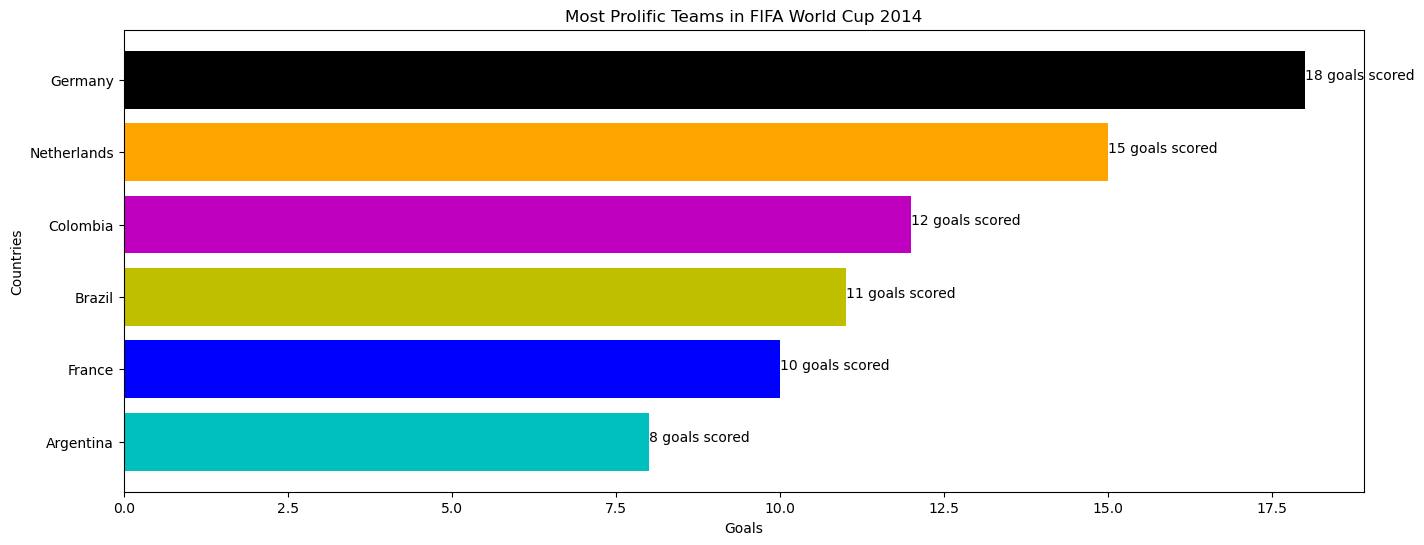

In [98]:
# count_dicti
new = pd.DataFrame.from_dict([count_dicti]).T.sort_values(by=0, ascending=False)
new = new.rename(columns={ 0:'Goals scored'})
new = new.reset_index().head(6)
new = new.rename(columns={ 'index':'Country'})
plt.figure(figsize=(16,6))
for index, value in enumerate(new['Goals scored'].sort_values()):
    plt.text(value, index,
             str(value)  +" goals scored")
plt.barh('Country', 'Goals scored', data=new.sort_values('Goals scored'), color=['c', 'b', 'y', 'm', 'orange', 'k'])
plt.xlabel("Goals")
plt.ylabel("Countries")
plt.title("Most Prolific Teams in FIFA World Cup 2014")
plt.show()

In [99]:
df_wc2014['scoreline'].value_counts()

scoreline
2-1    12
0-0     7
1-0     7
0-1     5
1-1     4
3-1     3
1-2     3
2-0     3
0-3     3
3-0     2
1-3     2
2-3     2
2-2     2
2-4     1
1-4     1
4-1     1
0-4     1
2-5     1
0-2     1
4-0     1
1-5     1
1-7     1
Name: count, dtype: int64